In [2]:
import sys
import import_ipynb
import csv
import torch.nn
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [33]:
#open file
FILE=open("wacky")

In [34]:
#Check how many of each kind of errors is in here
WHOLE_FILE=[]
DATA=[]
for LINE in FILE:
    DATA.append(LINE.split(None,1))
    LINE=''.join(s for s in LINE if ord(s)>31 and ord(s)<126)
    TEMP_l=LINE.split(None, 1)
    WHOLE_FILE.append(str(TEMP_l[1]))
    
COUNT=Counter(WHOLE_FILE)

In [35]:
DATA=[[I[0],''.join(s for s in I[1] if ord(s)>31 and ord(s)<126)] for I in DATA]
TIMES=[]
counter=0
for KEY in COUNT.keys():
    TIMES.append([KEY,[]])
    for ITER in range(len(DATA)):
        if str(KEY) in DATA[ITER]:
            TIMES[counter][1].append(DATA[ITER][0])
    counter+=1

In [36]:
HISTOGRAM_STUTTER=10000 #Check hour by hour
#3952544 largest
myrange=range(0,3952544)

TEMP=len(TIMES)*[0]
for i in tqdm(myrange[::HISTOGRAM_STUTTER]):
    for list_location in range(len(TEMP)):
        if TEMP[list_location]==0:
            TEMP[list_location]=[TIMES[list_location][0],[int(I) for I in TIMES[list_location][1] if (int(I)>=i and int(I)<=i+HISTOGRAM_STUTTER)]]
        else:
            TEMP[list_location].append([int(I) for I in TIMES[list_location][1] if int(I)>=i and int(I)<=i+HISTOGRAM_STUTTER])

In [37]:
TEMP[0:3]

[['1129711411',
  [0, 0, 0, 0],
  [],
  [28815, 28815, 28815, 28815],
  [36345,
   36420,
   36420,
   36480,
   36495,
   36550,
   36615,
   36620,
   37410,
   37420,
   37430,
   37435,
   37440,
   37440,
   39015],
  [42385, 42556, 42565],
  [],
  [63975,
   63975,
   63975,
   63975,
   63975,
   63975,
   63975,
   63975,
   65400,
   65405,
   65415,
   65415,
   65420,
   65425,
   65425,
   65430],
  [],
  [81590, 81590, 81590, 81590, 82630, 82630, 85140, 88105],
  [90705,
   91273,
   91275,
   91281,
   91283,
   91287,
   91289,
   91290,
   91290,
   92145,
   92145,
   92145,
   92145,
   92145,
   92145,
   92145,
   95327,
   96585,
   96586,
   96586,
   96587,
   96590],
  [101485,
   101485,
   101485,
   106545,
   106545,
   106545,
   106545,
   106545,
   106545,
   106545,
   106545],
  [],
  [],
  [138265, 138277, 138310, 138313, 138350, 138370],
  [],
  [154045, 154055, 154085],
  [],
  [],
  [185776,
   185777,
   185781,
   185801,
   185805,
   185818,
  

In [38]:
PLOTTER=[]
for error in TEMP:
    placeholder=[]
    for array in error[1:]:
        placeholder.append(len(array))
    PLOTTER.append([error[0],placeholder])

In [39]:
QUASAR=[]
for vec in PLOTTER:
    Dict={}
    for num in range(len(vec[1])):
        Dict[num]=vec[1][num]
    QUASAR.append([vec[0],Dict])

In [40]:
LEG=[str(I[0])for I in QUASAR]

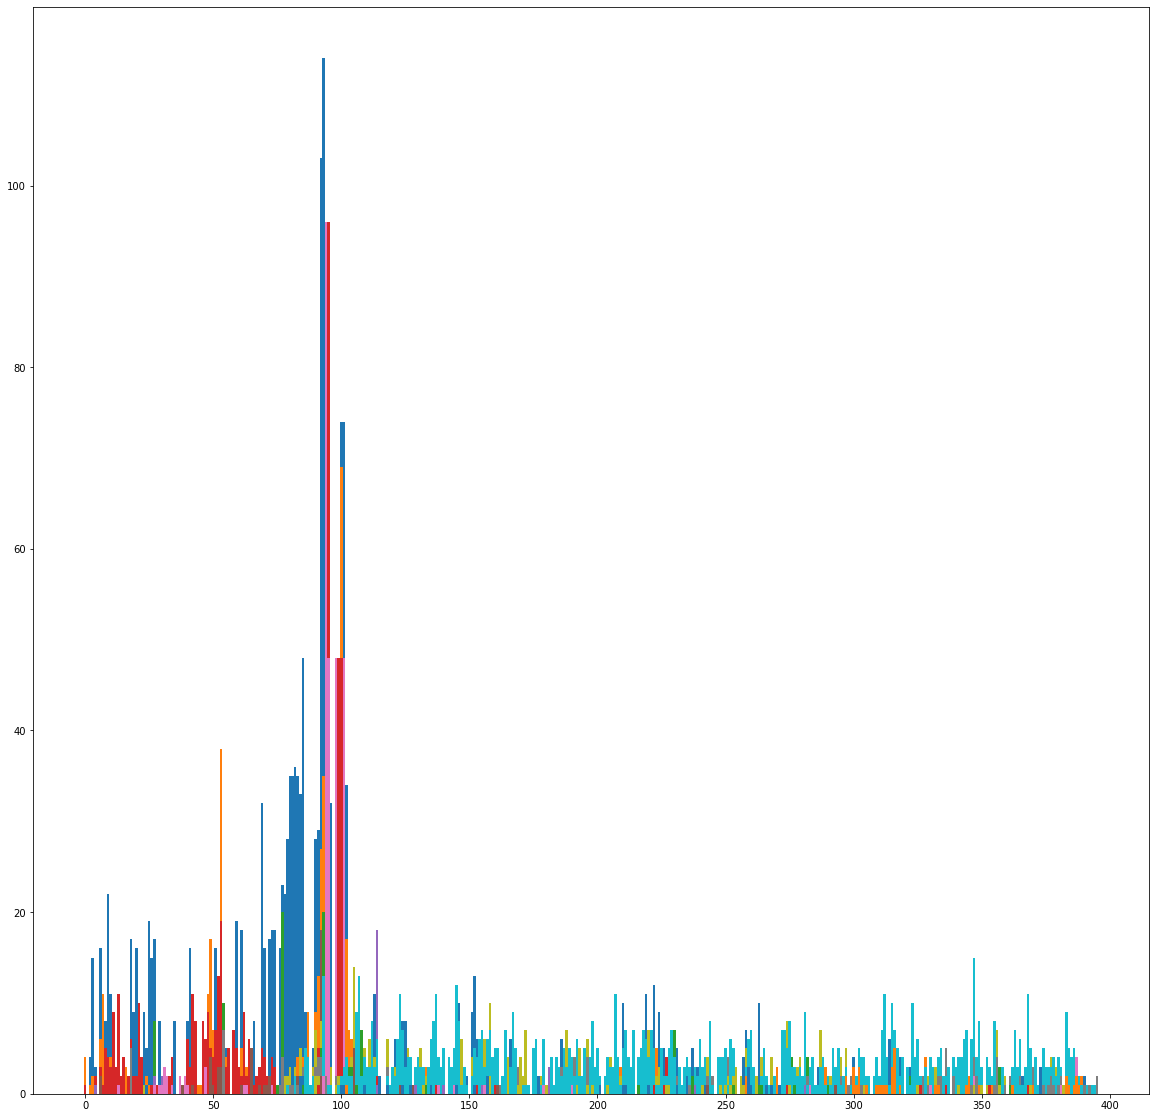

<Figure size 1440x1440 with 0 Axes>

In [43]:
#PLOT THE GRAPHS
oldnum=0
plt.figure(figsize=(20,20))
for num in tqdm(range(len(QUASAR))):
    plt.bar(QUASAR[num][1].keys(),QUASAR[num][1].values(), 1)
    
#plt.legend(LEG,loc=4)
plt.figure(figsize=(20,20))
plt.show()

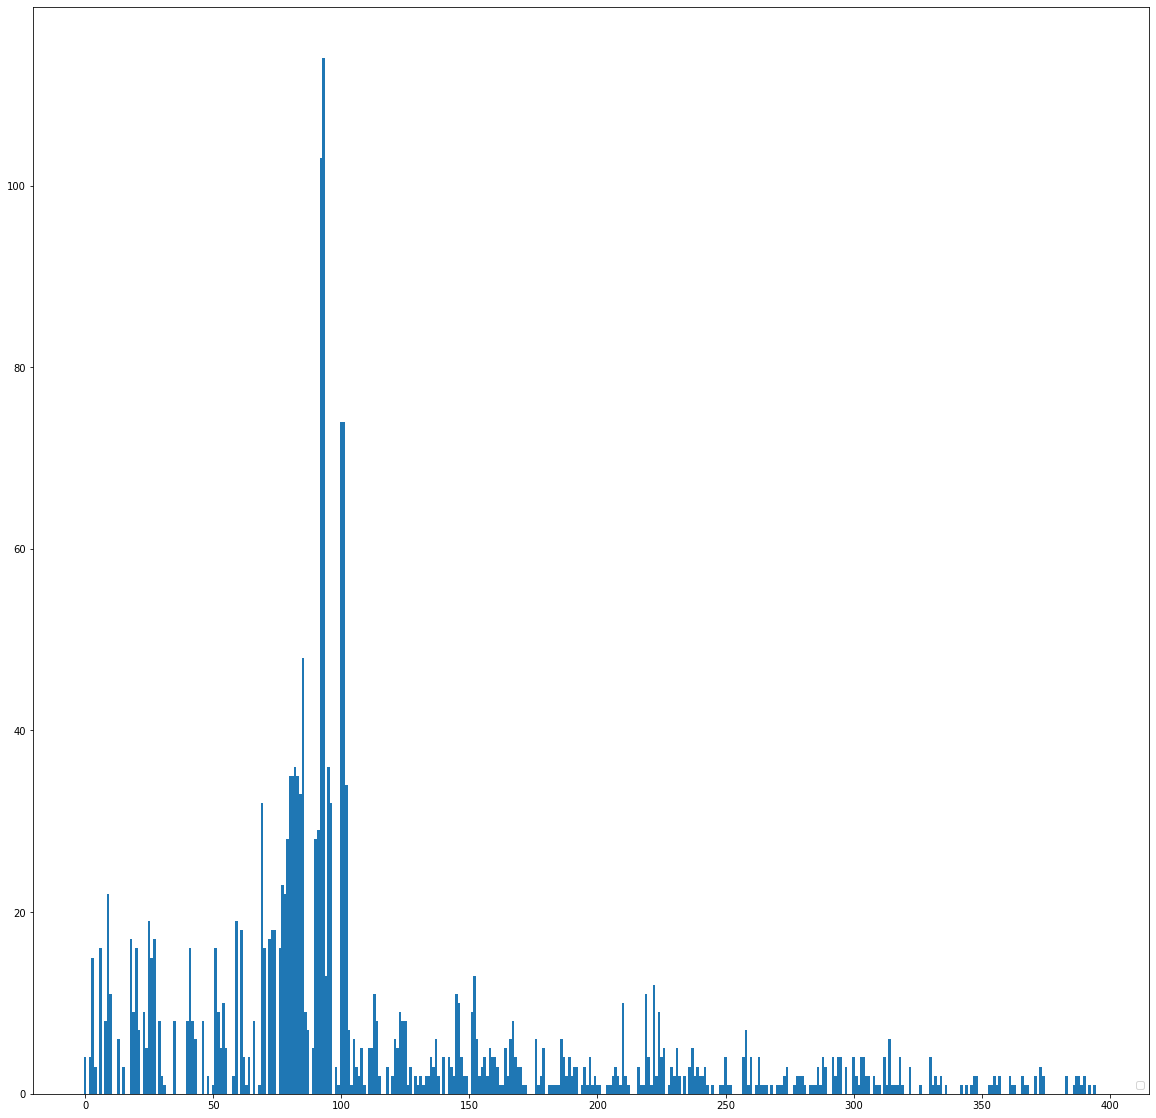

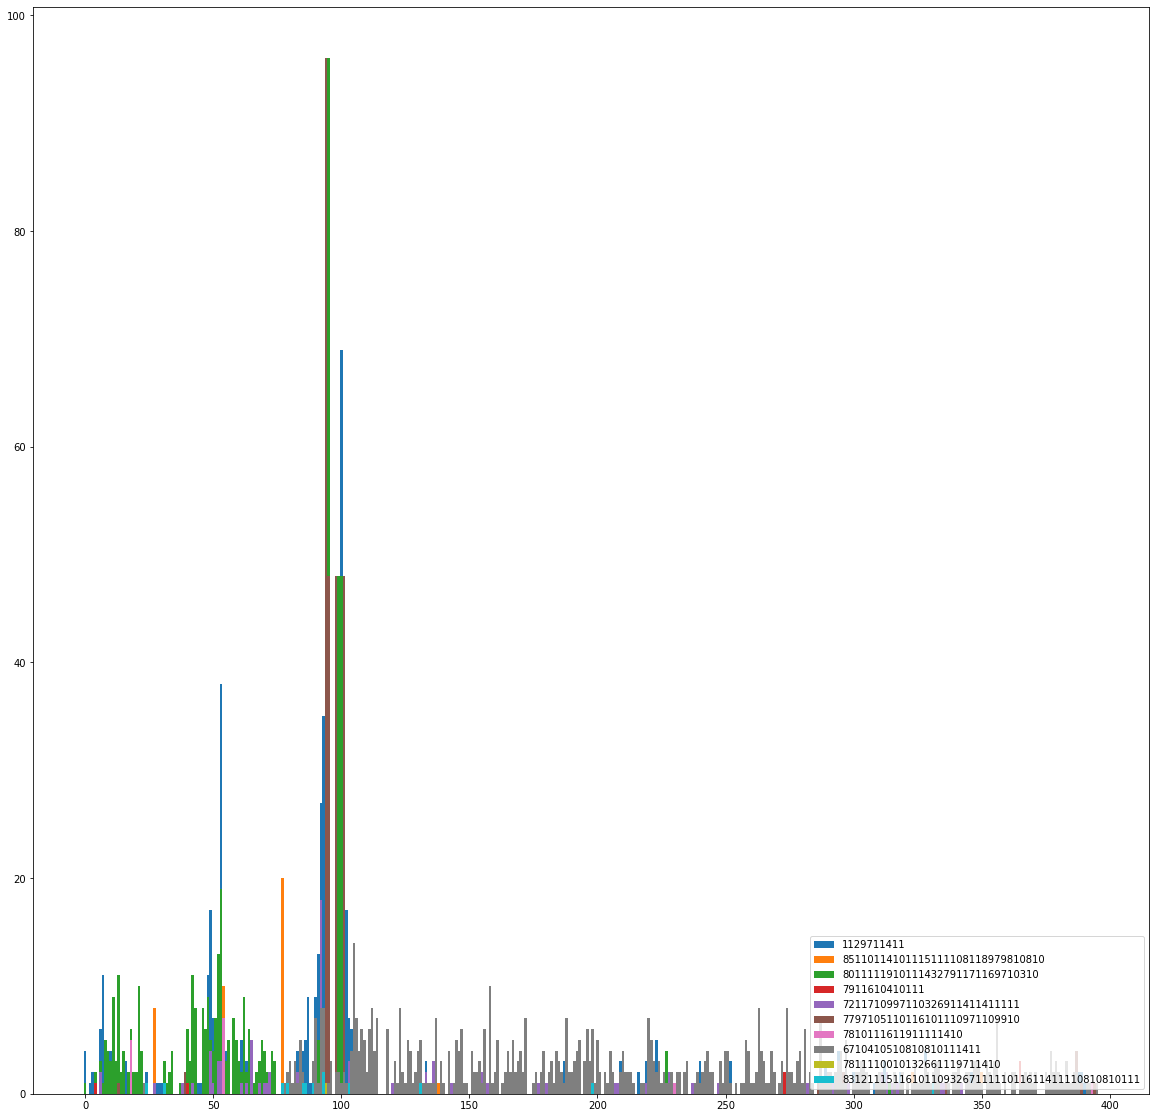

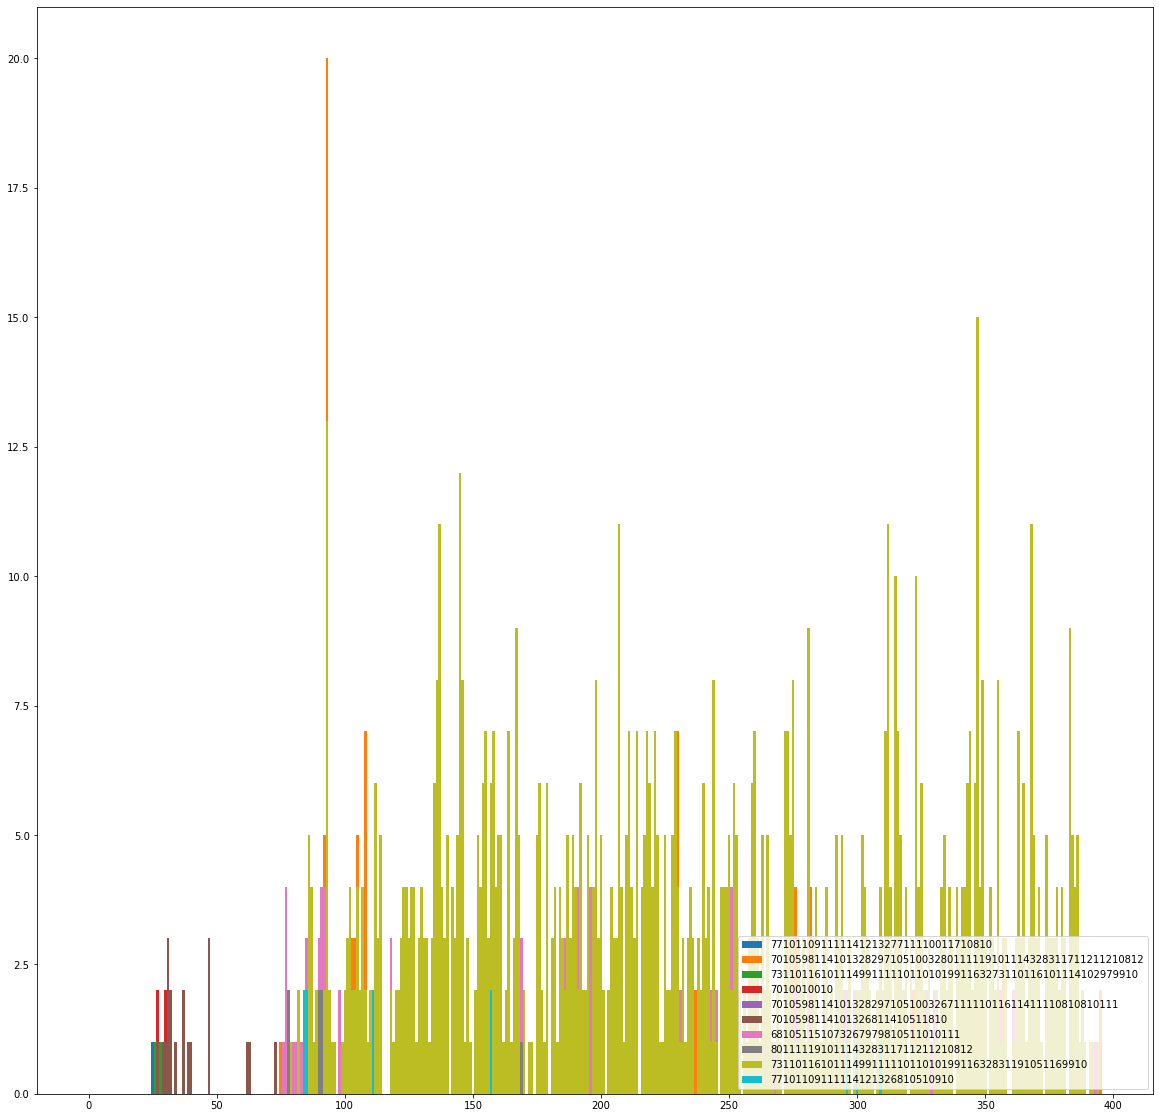

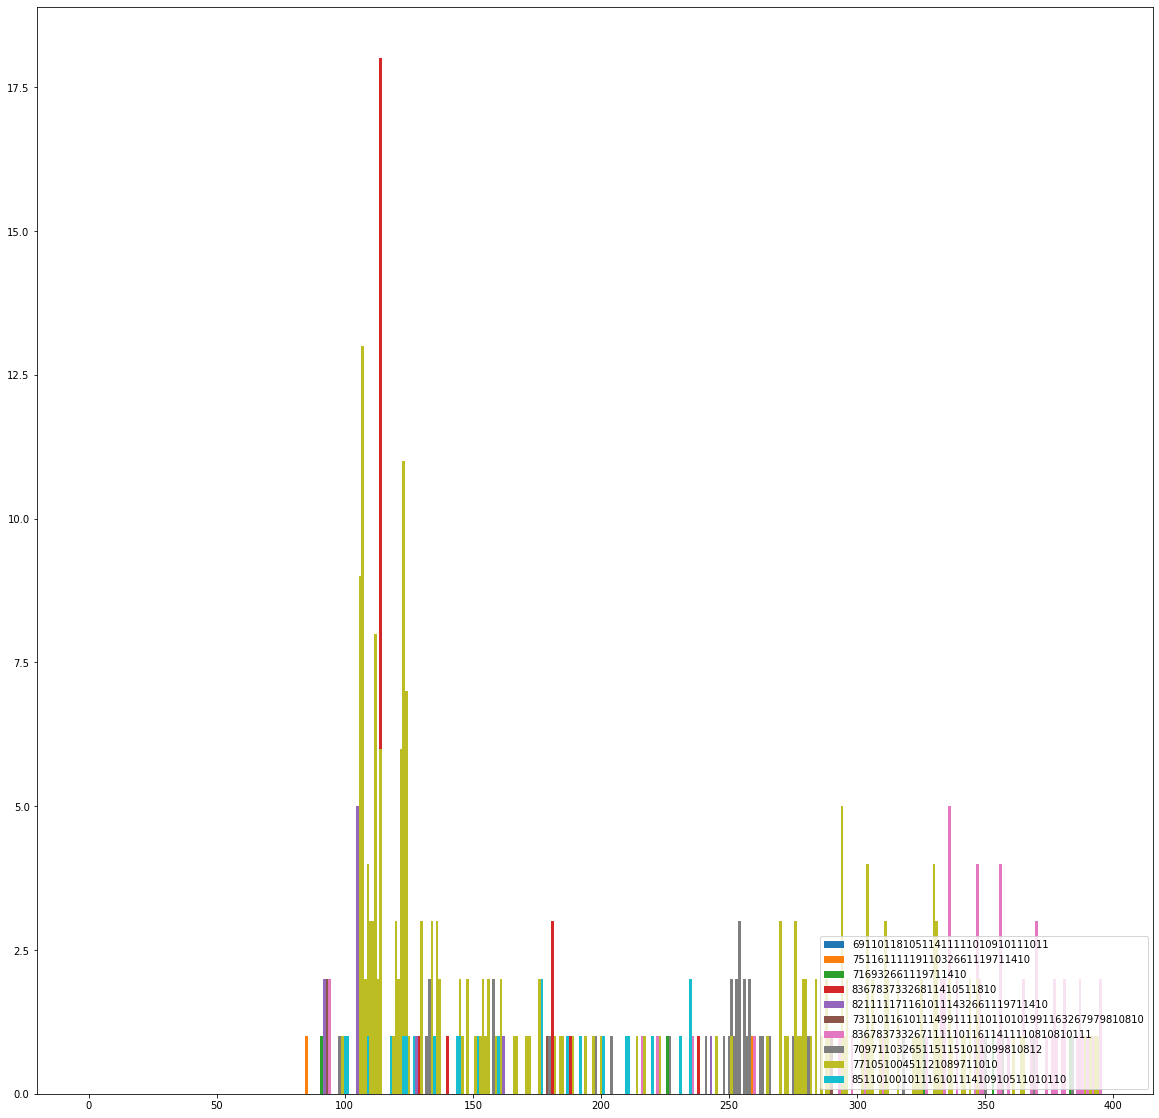

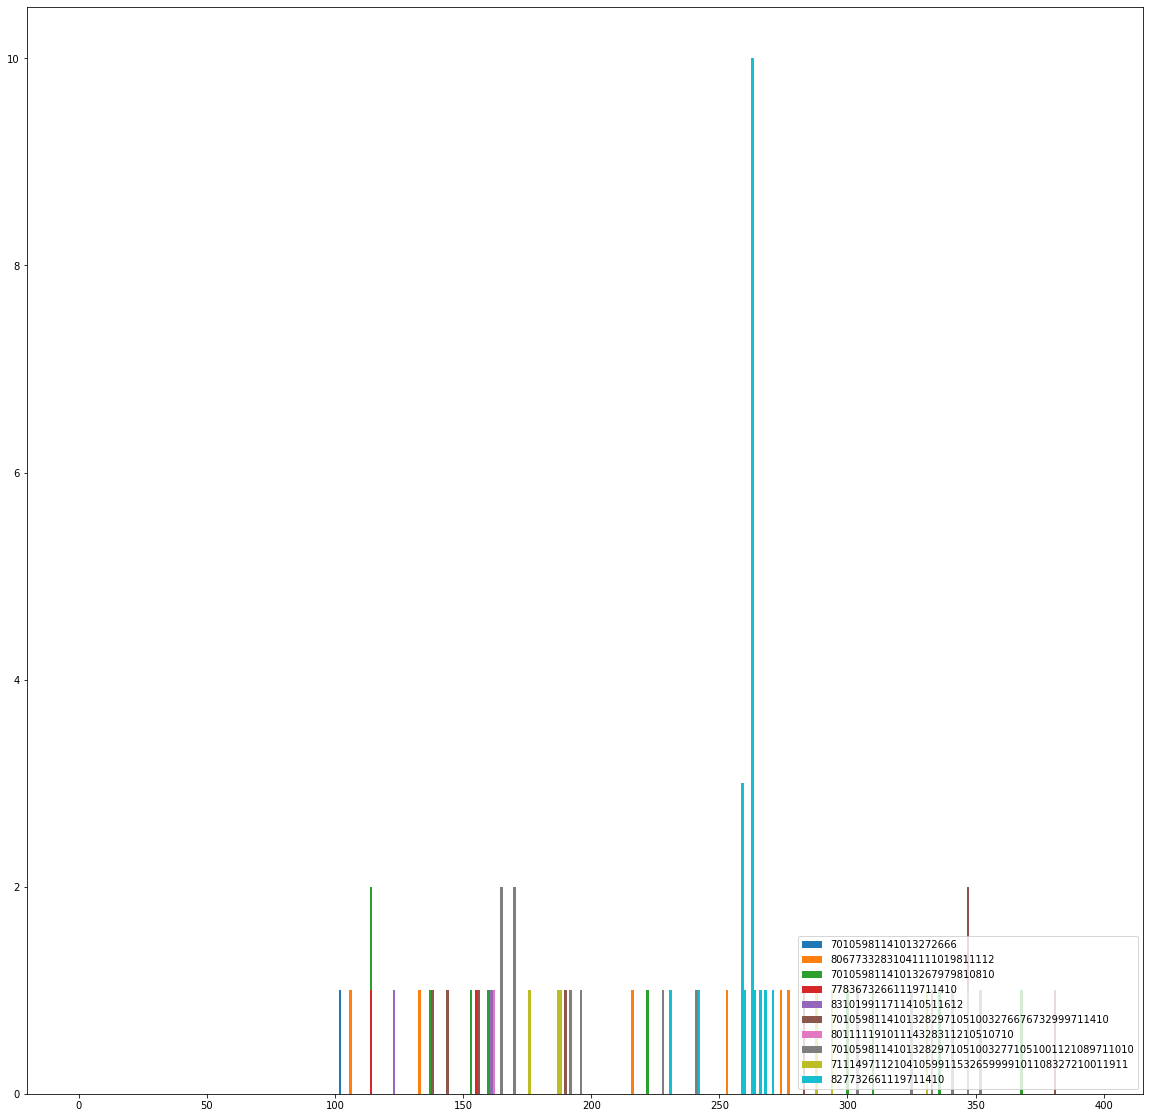

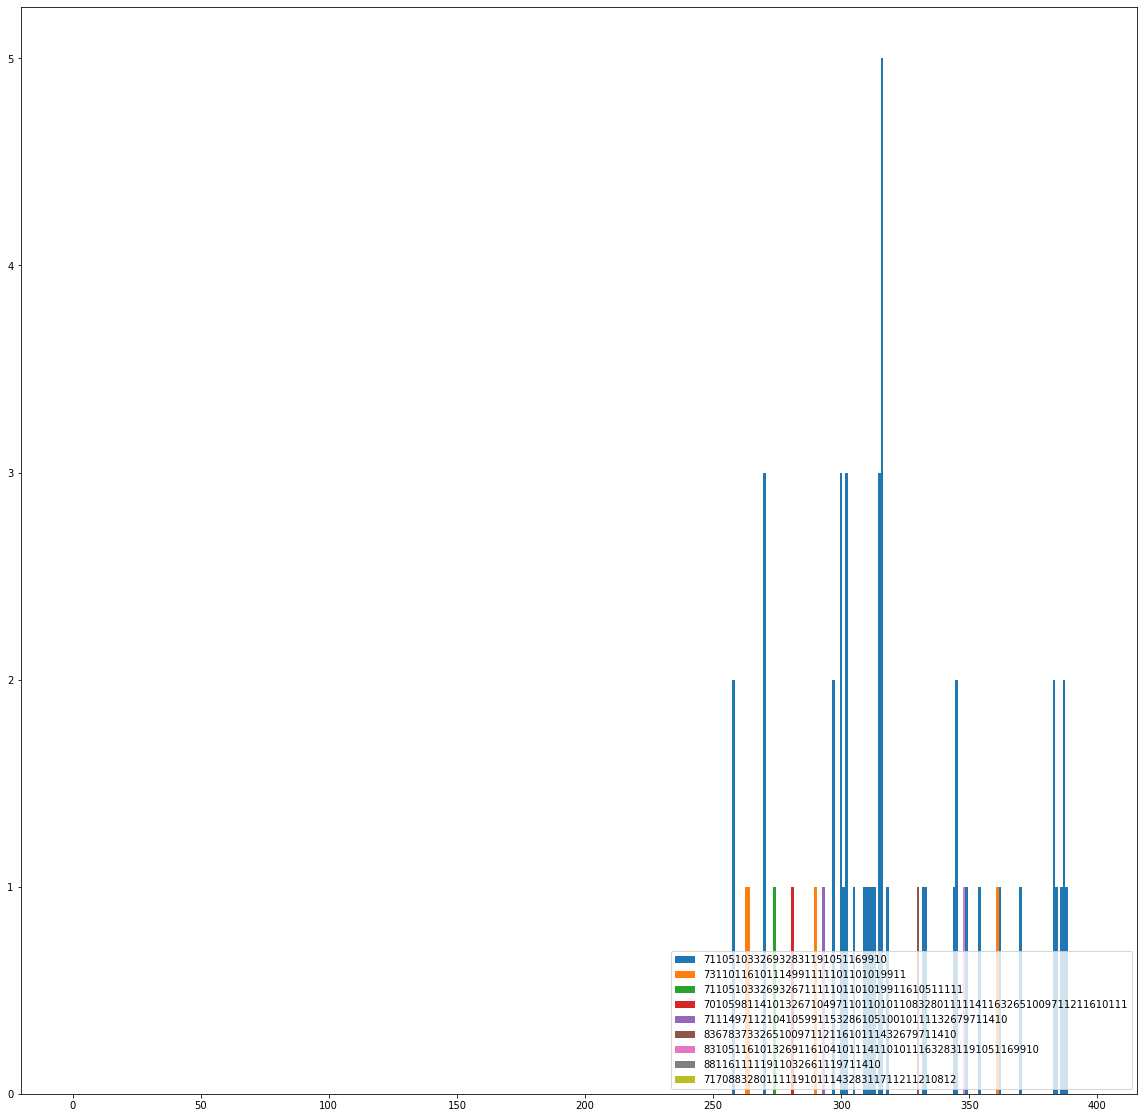

In [42]:
#PLOT THE GRAPHS (UNEDITED, ten per graph)
oldnum=0
plt.figure(figsize=(20,20))
for num in range(len(QUASAR)):
    plt.bar(QUASAR[num][1].keys(),QUASAR[num][1].values(), 1)
    plt.legend(LEG[oldnum:num],loc=4)
    if num%10==0:
        oldnum=num
        plt.show()
        plt.figure(figsize=(20,20))
